<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/Celinka_E_0706022210042_Week6_PIMA_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [14]:
import pandas as pd #import data dari csv/excel dll
import numpy as np #import linear algebra, manipulasi array
import matplotlib.pyplot as plt #menampilkan visualisasi data
import seaborn as sns #menampilkan visualisasi statistik dri data
from sklearn.preprocessing import LabelEncoder #mengubah label kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #membagi dataset menjadi data pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #membuat model pohon keputusan
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluasi model
from sklearn import tree #visualisasi pohon keputusan
from sklearn.naive_bayes import GaussianNB #membuat model Naive Bayes

In [15]:
#1
dataset = pd.read_csv('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/diabetes.csv')
dataset.sample(10)#menampikan 10 random data dari dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
164,0,131,88,0,0,31.6,0.743,32,1
492,4,99,68,38,0,32.8,0.145,33,0
2,8,183,64,0,0,23.3,0.672,32,1
113,4,76,62,0,0,34.0,0.391,25,0
124,0,113,76,0,0,33.3,0.278,23,1
25,10,125,70,26,115,31.1,0.205,41,1
500,2,117,90,19,71,25.2,0.313,21,0
650,1,91,54,25,100,25.2,0.234,23,0
225,1,87,78,27,32,34.6,0.101,22,0
645,2,157,74,35,440,39.4,0.134,30,0


In [16]:
#2
dataset.info()
# menampilkan ringkasan struktur dataset tentang jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori dari DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
#3
dataset.describe()
#menghasilkan statistik deskriptif dari kolom numerik dalam DataFrame. Untuk memahami distribusi dan variasi data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#4
colom = {'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'}
for col in colom:
  print(dataset[col].value_counts())
#menghitung frekuensi kemunculan nilai unik di kolom species, island, dan sex dalam dataset, termasuk nilai kosong jika ada (dropna=False)

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype

In [19]:
#5
dataset.dropna(inplace=True)
dataset.isnull().sum()
#dropna() digunakan untuk menghapus baris atau kolom yang mengandung nilai kosong (NaN).
#isnull() untuk memeriksa apakah ada nilai yang kosong (null atau NaN) di dalam dataset

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


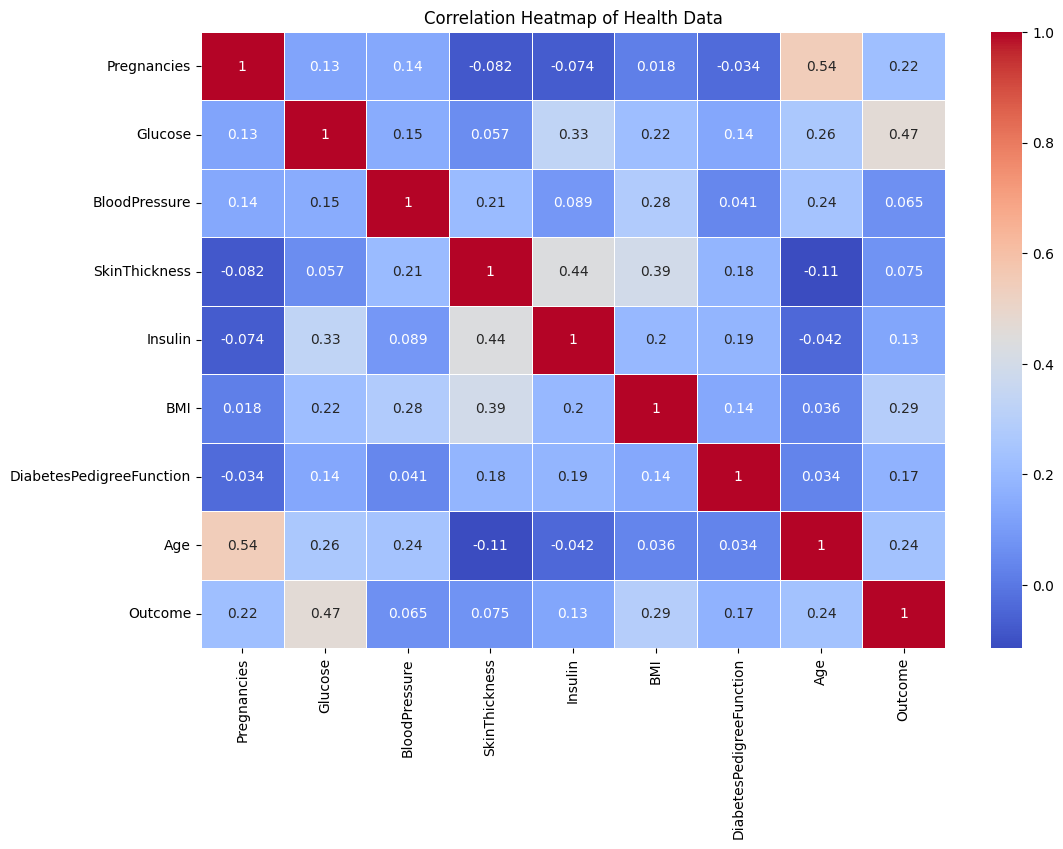

In [20]:
#6
plt.figure(figsize=(12, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#berisi matriks korelasi, yaitu sebuah tabel di mana baris dan kolomnya adalah variabel dalam dataset, dan setiap nilai dalam tabel adalah koefisien korelasi antara dua variabel.

#seaborn untuk membuat heatmap yang memvisualisasikan matriks korelasi.
# visualisasi heatmap
plt.title('Correlation Heatmap of Health Data')
plt.show()

#membuat heatmap korelasi yang membantu memvisualisasikan hubungan antar variabel dalam dataset menggunakan pandas, matplotlib, dan seaborn.

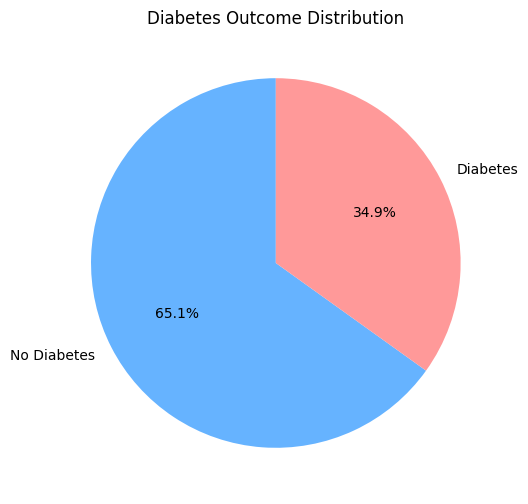

In [21]:
# 7
outcome_counts = dataset['Outcome'].value_counts() #kemunculan (frekuensi) setiap nilai dalam kolom Outcome. Fungsi value_counts() akan menghitung jumlah setiap kategori di kolom ini.
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Diabetes Outcome Distribution')
plt.show()
#memvisualisasikan distribusi dari kolom Outcome dalam dataset, yang mungkin mewakili kategori No Diabetes dan Diabetes
#

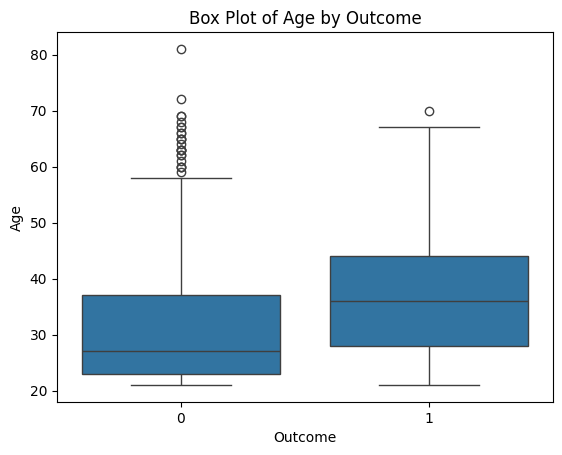

In [22]:
#8
sns.boxplot(x='Outcome', y='Age', data=dataset)
#x='Outcome': Variabel kategori Outcome ditempatkan di sumbu x (0: non-diabetes, 1: diabetes).
# y='Age': Variabel numerik Age ditempatkan di sumbu y untuk menunjukkan distribusi usi
plt.title('Box Plot of Age by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

#box plot yang memperlihatkan distribusi usia (Age) berdasarkan Outcome (diabetes atau tidak).
#dapat dilihat jika usia yang lebih tua mungkin lebih berisiko terkena diabetes.

# Machine **Learning**

In [23]:
#1
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

#memisahkan fitur (variabel independen) dan target (variabel dependen) dalam dataset untuk keperluan analisis atau model machine learning.

#X: DataFrame yang berisi semua kolom kecuali kolom species (dihapus dengan drop()).
#y: Series yang berisi kolom species, yang merupakan target yang ingin diprediksi.

In [24]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# membagi dataset menjadi dua bagian: data pelatihan (train) dan data pengujian (test) menggunakan fungsi train_test_split dari scikit-learn.
# X: Data fitur (input) yang akan digunakan untuk membuat model.
# y: Target atau label (output) yang akan diprediksi.
# test_size=0.20: Menentukan bahwa 20% dari dataset akan digunakan sebagai data pengujian, sementara 80% akan digunakan untuk pelatihan.
# random_state=42: Menjamin bahwa pembagian data selalu sama setiap kali kode dijalankan (agar hasil bisa direproduksi).

In [25]:
#3
print(X_train.shape)
print(X_test.shape)

#Mengetahui berapa banyak sampel dan fitur yang ada dalam data pelatihan dan pengujian setelah pembagian dataset, mencetak ukuran (dimensi) dari data fitur hasil pembagian (X_train dan X_test)
#X_train.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pelatihan. Biasanya, ini dalam bentuk (jumlah sampel, jumlah fitur).
#X_test.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pengujian.

(614, 8)
(154, 8)


Decision Tree

Entropy

In [26]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

#criterion='entropy': Menggunakan entropy sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, untuk menghindari overfitting.
#random_state=0: Menetapkan seed untuk memastikan bahwa hasil pembagian akan selalu sama setiap kali kode dijalankan (agar bisa direproduksi).
#clf_en.fit = Melatih (fit) model dengan data pelatihan (X_train dan y_train), sehingga model dapat mempelajari hubungan antara fitur (X_train) dan target (y_train).

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
#b
y_pred_en = clf_en.predict(X_test)

#clf_en = untuk prediksi target (label) dari data fitur pengujian X_test.
# y_pred_en = perkiraan nilai target yang sesuai untuk setiap sampel dalam X_test.

In [28]:
#c
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
#accuracy_score = Menghitung skor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en). Akurasi adalah rasio jumlah prediksi yang benar terhadap total prediksi.
#{0:0.4f}: Format untuk mencetak hasil akurasi dengan 4 angka desimal.

Model accuracy score with criterion entropy index: 0.7662


In [29]:
#d
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
#clf_en.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang sudah dilatih
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
#clf_en.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumny


Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

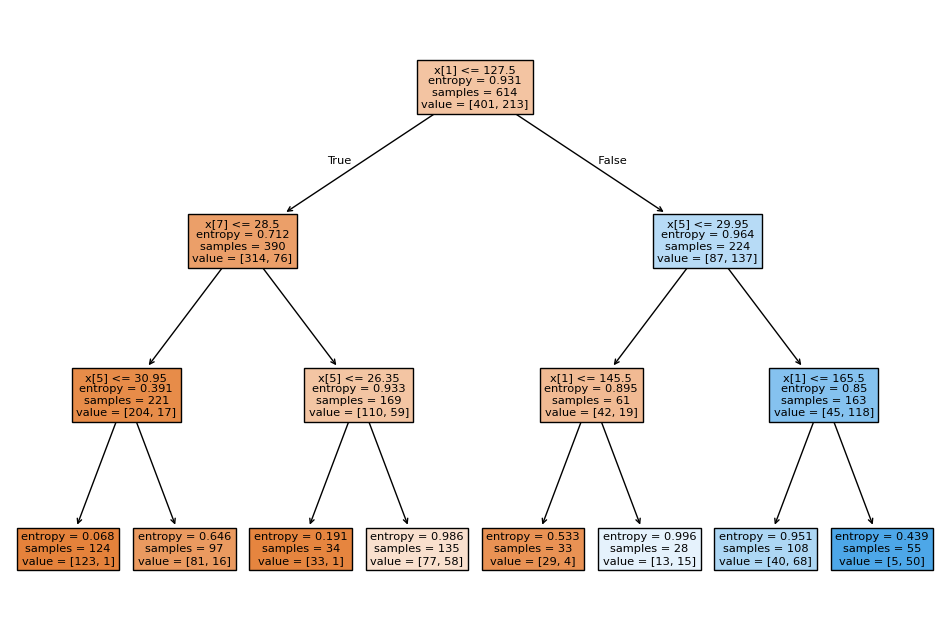

In [30]:
#e
plt.figure(figsize=(12,8))
# figure (kanvas gambar) dengan ukuran 12x8 inci untuk visualisasi, sehingga lebih besar dan lebih mudah dilihat.

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

#clf_en.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan.
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.
#filled=True: Mengisi setiap node dengan warna yang menunjukkan dominasi kelas di node tersebut, memudahkan interpretasi visual.

# Gini

In [31]:
#a
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

#criterion='gini': Menggunakan Gini impurity sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, yang dapat mencegah model overfitting.
#random_state=0: Menetapkan seed untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
#clf_gini.fit: Melatih model dengan data pelatihan (X_train, y_train).

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
#b
y_pred_gini = clf_gini.predict(X_test)
#clf_gini.predict(X_test): Menggunakan model clf_gini (yang sudah dilatih) untuk memprediksi label (target) dari data fitur pengujian X_test.
#y_pred_gini: Hasil prediksi dari model, yaitu nilai target yang diperkirakan untuk setiap sampel dalam X_test.

In [33]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#kor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).
#Akurasi dihitung sebagai rasio jumlah prediksi yang benar terhadap total jumlah prediksi.

Model accuracy score with criterion gini index: 0.7597


In [34]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
#clf_gini.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang telah dilatih.
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))
#clf_gini.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumnya.

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

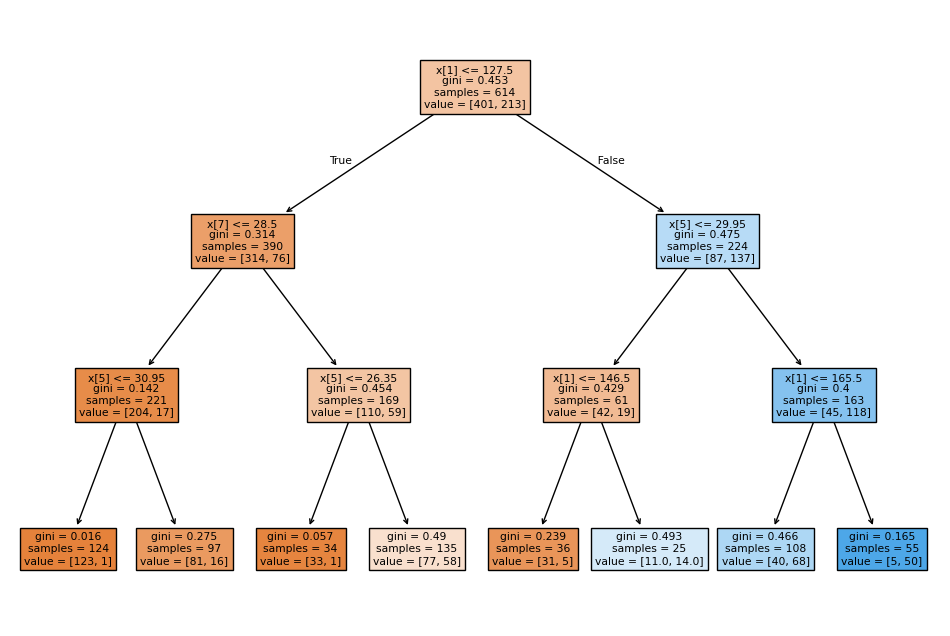

In [35]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)
#clf_gini.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan (X_train dan y_train).
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.

In [36]:
#f
#confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_en)
cm_en = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix entropy: \n', cm_gini)
print('Confusion matrix gini index: \n', cm_en)

#confusion_matrix(y_test, y_pred_en): Menghitung confusion matrix untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#confusion_matrix(y_test, y_pred_gini): Menghitung confusion matrix untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).


Confusion matrix entropy: 
 [[83 16]
 [20 35]]
Confusion matrix gini index: 
 [[83 16]
 [21 34]]


In [37]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

#classification_report(y_test, y_pred_en): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#classification_report(y_test, y_pred_gini): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini)

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



### Entropy menunjukkan kinerja yang lebih baik dibandingkan Gini. Dengan akurasi 0.7662, Gini hanya 0.7597. Entropy juga lebih baik dalam precision (0.81 untuk kelas 0 dan 0.69 untuk kelas 1) dan recall (0.84 untuk kelas 0 dan 0.64 untuk kelas 1). Secara keseluruhan, Entropy lebih unggul dalam semua metrik evaluasi, menjadikannya pilihan yang lebih baik untuk dataset ini.

# Naive Bayes

In [38]:
#a
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#nb_classifier = GaussianNB(): Membuat instance dari kelas GaussianNB, yang akan digunakan sebagai model klasifikasi.
#nb_classifier.fit(X_train, y_train): Melatih model nb_classifier menggunakan data pelatihan X_train (fitur) dan y_train (label target).
#Model ini belajar dari data pelatihan untuk menentukan hubungan antara fitur dan kelas target.

GaussianNB()

In [39]:
#b
nb_y_pred = nb_classifier.predict(X_test)
#Naive Bayes yang telah dilatih (nb_classifier) untuk memprediksi label (kelas) dari data pengujian (X_test).
#nb_y_pred: Variabel ini menyimpan hasil prediksi, yang berupa array dari label yang diprediksi untuk setiap contoh dalam X_test.

In [40]:
#c & d
nb_cm = confusion_matrix(y_test, nb_y_pred)
#confusion matrix menggunakan fungsi confusion_matrix dari scikit-learn, yang membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred). Confusion matrix ini memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas.
print("Confusion Matrix:\n", nb_cm)
print("naive bayes Accuracy Score: ", accuracy_score(y_test, nb_y_pred))
#Akurasi dihitung sebagai proporsi jumlah prediksi yang benar terhadap total jumlah data

Confusion Matrix:
 [[79 20]
 [16 39]]
naive bayes Accuracy Score:  0.7662337662337663


In [41]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))
#classification_report menghitung dan mencetak laporan klasifikasi. Laporan ini membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred).

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



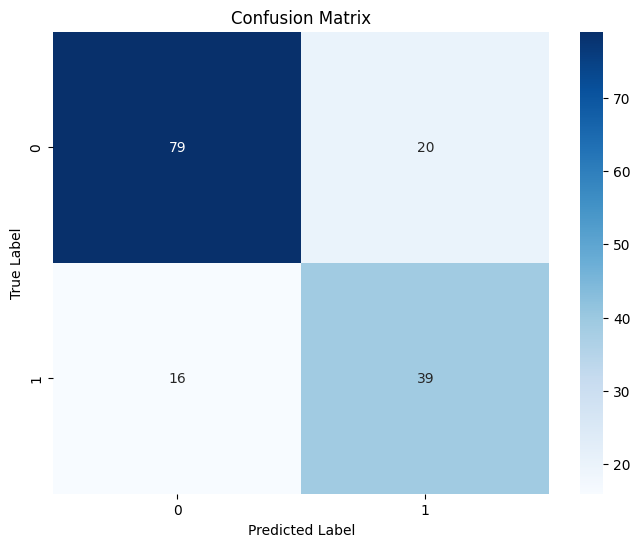

In [42]:
# heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#cm: Data yang akan dipetakan.
#annot=True: Menampilkan nilai di dalam sel heatmap.
#fmt='d': Mengatur format tampilan angka menjadi desimal (bilangan bulat).
#cmap='Blues': Mengatur palet warna heatmap menjadi variasi biru.

## Naive Bayes memiliki akurasi 0.7662, setara dengan Decision Tree dengan kriteria Entropy. Precision untuk kelas 0 adalah 0.83 dan kelas 1 adalah 0.66, sedangkan recall-nya 0.80 untuk kelas 0 dan 0.71 untuk kelas 1. Dapat dikatakan Naive Bayes memiliki akurasi yang cukup baik untuk data ini

# LogisticRegression

In [43]:
#a

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200) #batas maksimal iterasi algoritma dalam proses optimasi. Jika konvergensi tidak tercapai dalam 200 iterasi, proses fitting akan berhenti.
classifier.fit(X_train,y_train) #menyesuaikan model berdasarkan data yang diberikan sehingga model siap untuk memprediksi data baru

LogisticRegression(max_iter=200)

In [44]:
#b

y_pred_log = classifier.predict(X_test)

comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log}) #
print(comparison_table.head())
#menggunakan model Logistic Regression yang sudah dilatih, kemudian membandingkan hasil prediksi dengan nilai sebenarnya pada data uji

     y_test  y_pred
668       0       0
324       0       0
624       0       0
690       0       0
473       0       0


In [45]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) #mencetak hasil akurasi dalam format float dengan 4 angka desimal.
#menampilkan akurasi dari model klasifikasi yang telah dilatih, yaitu Logistic Regression.

Accuracy Score: 0.7468


In [46]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n",cmatrix)
#menampilkan confusion matrix, yang merupakan alat evaluasi untuk model klasifikasi.
#

Confusion Matrix:
 [[78 21]
 [18 37]]


In [47]:
# e
print (classification_report (y_test, y_pred_log))
#menampilkan laporan klasifikasi (classification report) yang memberikan metrik evaluasi lebih mendetail dari model klasifikasi.

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Logistic Regression memiliki akurasi 0.7468, yang lebih rendah dibandingkan dengan Naive Bayes dan Decision Tree. Precision untuk kelas 0 adalah 0.81 dan kelas 1 adalah 0.64, sedangkan recall-nya 0.79 untuk kelas 0 dan 0.67 untuk kelas 1.

### Dari Model Accuration, dapat dilihat Model accuracy score with criterion entropy index: 0.7662. Model accuracy score with criterion entropy index: 0.7662. naive bayes Accuracy Score:  0.7662 dan Accuracy Score: 0.7468.
Maka urutan paling bagus untuk prediksi data diabetes yaitu:
1. Entropy
2. Naive Bayes
3. Gini
4. Logistic Regression

### karena memiliki akurasi terendah (0.7468) dan kurang efektif dalam menangkap kasus positif pada kelas 1 dibandingkan dengan model lainnya.